In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score 
from sklearn.metrics import recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from sklearn.utils.class_weight import compute_class_weight 

In [16]:
url= 'newthyroid2.csv'
df = pd.read_csv(url) 

In [17]:
df.head()

,T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,output
0,107,10.1,2.2,0.9,2.7,negative
1,113,9.9,3.1,2.0,5.9,negative
2,127,12.9,2.4,1.4,0.6,negative
3,109,5.3,1.6,1.4,1.5,negative
4,105,7.3,1.5,1.5,-0.1,negative


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(df.info())
print(df['output'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   T3resin              215 non-null    int64  
 1    Thyroxin            215 non-null    float64
 2    Triiodothyronine    215 non-null    float64
 3    Thyroidstimulating  215 non-null    float64
 4    TSH_value           215 non-null    float64
 5   output               215 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 10.2+ KB
None
output
negative    180
positive     35
Name: count, dtype: int64


C:\Users\mahip\AppData\Local\Temp\ipykernel_9220\3873037777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=df, palette='viridis')


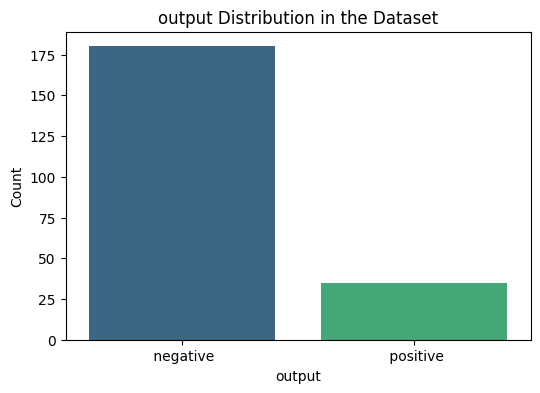

In [7]:
# 1. Plot the class distribution to show imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='output', data=df, palette='viridis')
plt.title('output Distribution in the Dataset')
plt.xlabel('output')
plt.ylabel('Count')
plt.show()

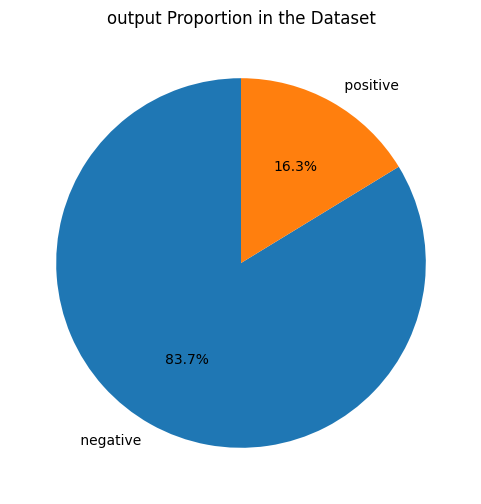

In [19]:
# 2. Plot a pie chart to visualize class proportions
plt.figure(figsize=(6, 6))
class_counts = df['output'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('output Proportion in the Dataset')
plt.show()

In [21]:
df

,T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,output
0,107,10.1,2.2,0.9,2.7,negative
1,113,9.9,3.1,2.0,5.9,negative
2,127,12.9,2.4,1.4,0.6,negative
3,109,5.3,1.6,1.4,1.5,negative
4,105,7.3,1.5,1.5,-0.1,negative
...,...,...,...,...,...,...
210,118,6.5,1.3,1.7,11.5,negative
211,139,4.2,0.7,4.3,6.3,negative
212,103,5.1,1.4,1.2,5.0,negative
213,97,4.7,1.1,2.1,12.6,negative


In [22]:
# Features and Target
X = df.drop('output', axis=1)
y = df['output']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
y_test.shape

(65,)

In [26]:
# Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train) 

In [27]:
# Random Over Sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train) 

In [28]:
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train) 

In [29]:
# Tomek Links
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train) 

In [30]:
# Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

In [51]:
# Function to evaluate model performance
def evaluate_model(X_train, y_train, X_test, y_test, class_weights=None):
    model = RandomForestClassifier(class_weight=class_weights, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_prob)) 
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=0),
        'AUC': roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    }

In [52]:
# Evaluate each sampling technique
print("Random Undersampling:")
evaluate_model(X_rus, y_rus, X_test, y_test)

print("\nRandom Oversampling:")
evaluate_model(X_ros, y_ros, X_test, y_test)

print("\nSMOTE:")
evaluate_model(X_smote, y_smote, X_test, y_test)

print("\nTomek Links:")
evaluate_model(X_tl, y_tl, X_test, y_test)

print("\nClass Weights:")
evaluate_model(X_train, y_train, X_test, y_test, class_weights_dict) 

Random Undersampling:
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        54
    positive       0.79      1.00      0.88        11

    accuracy                           0.95        65
   macro avg       0.89      0.97      0.93        65
weighted avg       0.96      0.95      0.96        65

AUC: 0.9966329966329966

Random Oversampling:
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99        54
    positive       1.00      0.91      0.95        11

    accuracy                           0.98        65
   macro avg       0.99      0.95      0.97        65
weighted avg       0.98      0.98      0.98        65

AUC: 0.9966329966329965

SMOTE:
              precision    recall  f1-score   support

    negative       0.98      0.98      0.98        54
    positive       0.91      0.91      0.91        11

    accuracy                           0.97        65
   macro avg       0.95     

{'Accuracy': 0.9692307692307692,
 'Precision': 0.9703296703296703,
 'Recall': 0.9692307692307692,
 'F1-Score': 0.9679720279720279,
 'AUC': np.float64(0.9966329966329966)}

In [53]:
# Combine X and y for each sampling method
df_rus = pd.concat([X_rus, y_rus], axis=1)
df_ros = pd.concat([X_ros, y_ros], axis=1)
df_smote = pd.concat([X_smote, y_smote], axis=1)
df_tl = pd.concat([X_tl, y_tl], axis=1)

# Save to CSV
df_rus.to_csv('Random_Undersampling_Balanced.csv', index=False)
df_ros.to_csv('Random_Oversampling_Balanced.csv', index=False)
df_smote.to_csv('SMOTE_Balanced.csv', index=False)
df_tl.to_csv('TOMEK_Links_balanced.csv', index=False)

In [54]:
samplers = {
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'Random Oversampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'Tomek Links': TomekLinks()
}

In [55]:
results = {}

for name, sampler in samplers.items():
    X_res, y_res = sampler.fit_resample(X_train, y_train)
    result = evaluate_model(X_res, y_res, X_test, y_test)
    results[name] = result
    # Save balanced datasets
    balanced_df = pd.concat([X_res, y_res], axis=1)
    balanced_df.to_csv(f'{name.replace(" ", "_")}_Balanced.csv', index=False)

# Evaluate Class Weight Method
results['Class Weights'] = evaluate_model(X_train, y_train, X_test, y_test, class_weights_dict)

# Store Results in DataFrame
comparison_df = pd.DataFrame(results).T
print("\nComparison Table of Model Performance:\n")
print(comparison_df)

# Save Comparison Table
comparison_df.to_csv('Sampling_Techniques_Comparison.csv')

              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        54
    positive       0.79      1.00      0.88        11

    accuracy                           0.95        65
   macro avg       0.89      0.97      0.93        65
weighted avg       0.96      0.95      0.96        65

AUC: 0.9966329966329966
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99        54
    positive       1.00      0.91      0.95        11

    accuracy                           0.98        65
   macro avg       0.99      0.95      0.97        65
weighted avg       0.98      0.98      0.98        65

AUC: 0.9966329966329965
              precision    recall  f1-score   support

    negative       0.98      0.98      0.98        54
    positive       0.91      0.91      0.91        11

    accuracy                           0.97        65
   macro avg       0.95      0.95      0.95        65
weighted avg       0.97   